In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
# Step 1: Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2678.2971 - mean_absolute_error: 41.5876 - val_loss: 2901.7583 - val_mean_absolute_error: 42.9943
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2507.3074 - mean_absolute_error: 40.1361 - val_loss: 2931.4624 - val_mean_absolute_error: 43.3303
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2655.9243 - mean_absolute_error: 40.6484 - val_loss: 2925.1240 - val_mean_absolute_error: 43.2540
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2536.2969 - mean_absolute_error: 40.3932 - val_loss: 2897.9822 - val_mean_absolute_error: 43.0259
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2779.3643 - mean_absolute_error: 41.5974 - val_loss: 2884.0239 - val_mean_absolute_error: 42.9257
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2494.2441 - mean_absolute_error: 39.9238 - val_loss: 2891.9319 - val_mean_absolute_error: 42.9920
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [ ]:
# Step 7: Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3735.1584 - mean_absolute_error: 49.1085 
Test Loss: [3455.10107421875, 46.7659797668457]


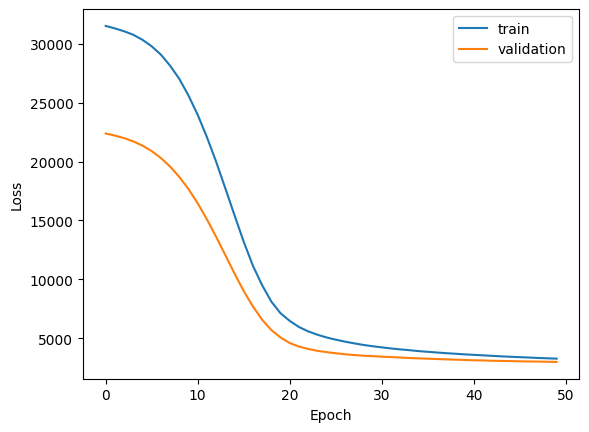

In [ ]:
# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Step 8: Make predictions
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


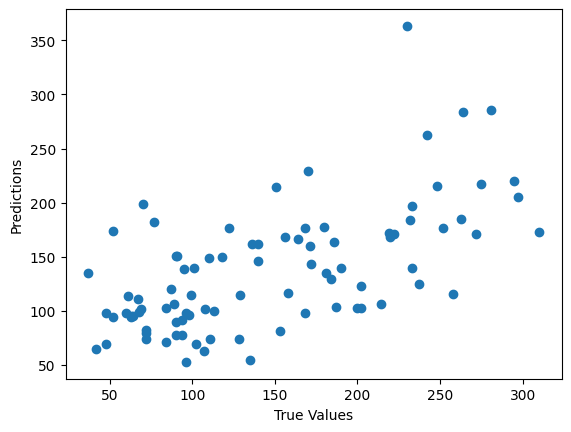

In [ ]:
# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()